📷 Cifar-10 Image Classifiction 🚀

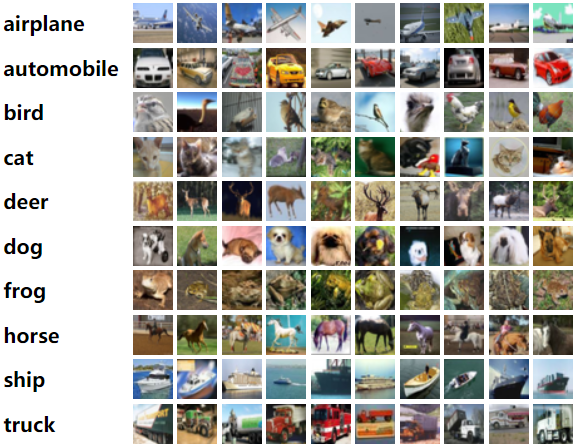

# Introduction 💥

Our goal is to create an accurate deep learning model that can classify the images using the given data.

<ul>
<li>In this notebook, we will explore the task of image classification using the CIFAR-10 dataset. CIFAR-10 is a widely used benchmark dataset in the field of computer vision, consisting of 60,000 32x32 color images across 10 different classes. The goal of this project is to build a Convolutional Neural Network (CNN) model that can accurately classify these images into their respective categories.</li>

<li>We will start by setting up the environment and preparing the dataset, including loading the training and test data, as well as their corresponding labels. Then, we will preprocess the data and split it into training and validation sets for model training. Our chosen CNN architecture will consist of multiple convolutional and fully connected layers, carefully designed to capture and learn relevant features from the images.</li>

<li>To improve model performance and prevent overfitting, we will incorporate techniques such as data augmentation, batch normalization, and dropout. The model will be trained using the training set and validated on the validation set. Once training is complete, we will use the trained model to predict the classes of the test images.<li>

Our objective is to achieve high accuracy in classifying CIFAR-10 images and gain insights into the realm of image classification using deep learning.</li>




# Data Description

In this notebook we are going to build a CNN model that can classify images of various objects. We have 10 class of images:

1.**Airplane**

2.**Automobile**

3.**Bird**

4.**Cat**

5.**Deer**

6.**Dog**

7.**Frog**

8.**Horse**

9.**Ship**

10.**Truck**

# Loading Libarries

In [1]:
import numpy as np
import pandas as pd

#visuals
import matplotlib.pyplot as plt
import seaborn as sns

#sklearn
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report

#keras
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from keras.models import load_model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models,layers
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization,Conv2D,MaxPool2D,Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers.experimental import SGD,Adam

#warnings
import warnings
warnings.filterwarnings('ignore')

#Get the data

In [2]:
(X_train,y_train) , (X_test,y_test) = cifar10.load_data()


170498071/170498071 [==============================] - 2s 0us/step


In [3]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

# Data Exploration

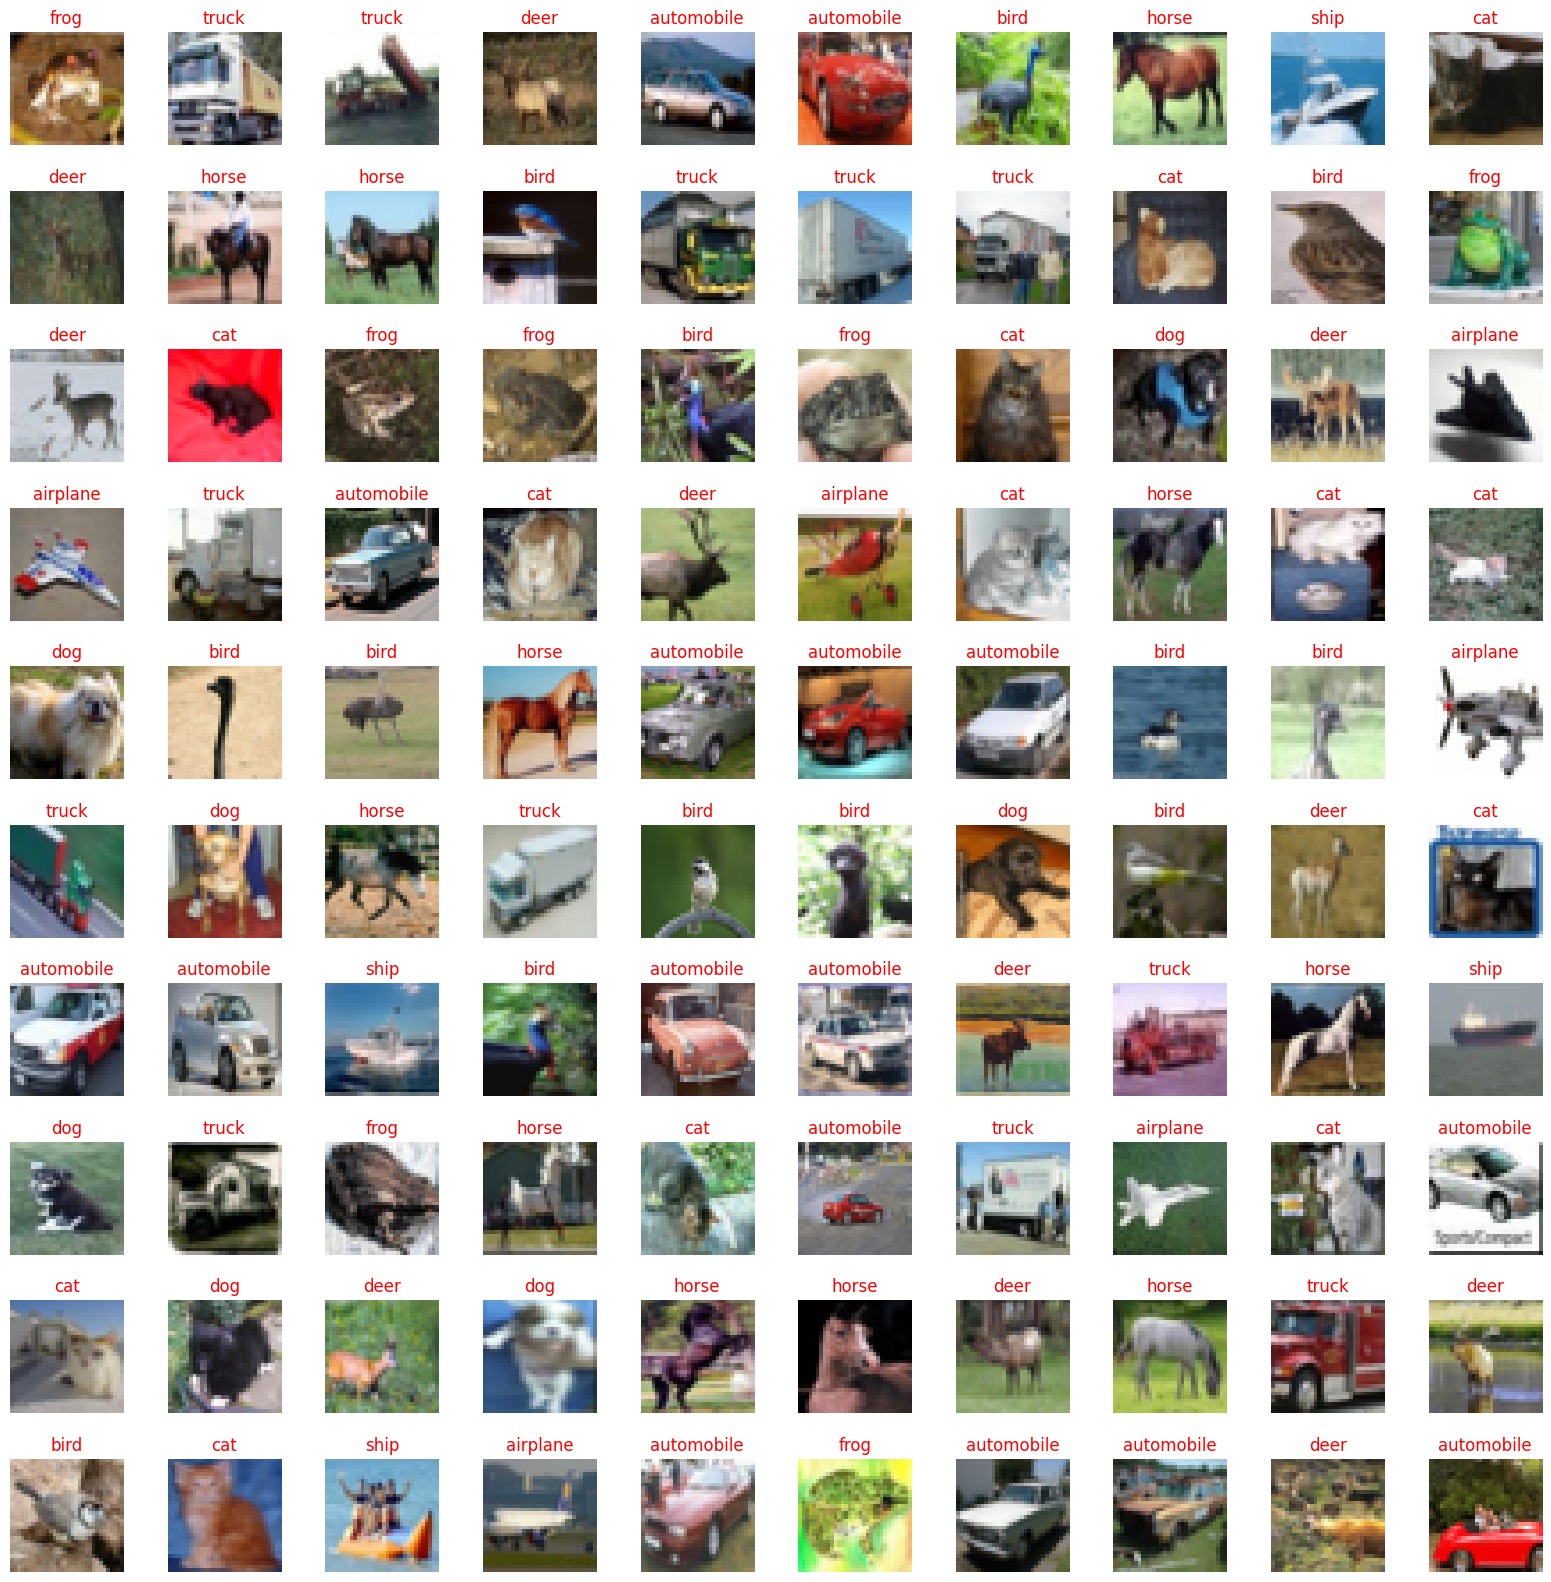

In [4]:
plt.figure(figsize=(20,20))
plt.subplots_adjust(hspace=0.4)

labels = ['airplane', 'automobile', 'bird', 'cat', 'deer',
          'dog', 'frog', 'horse', 'ship', 'truck']

for i in range(100):
  plt.subplot(10,10,i+1)
  plt.imshow(X_train[i])
  plt.title(labels[int(y_train[i])],fontsize=12,c='r')
  plt.axis('off')

plt.show()

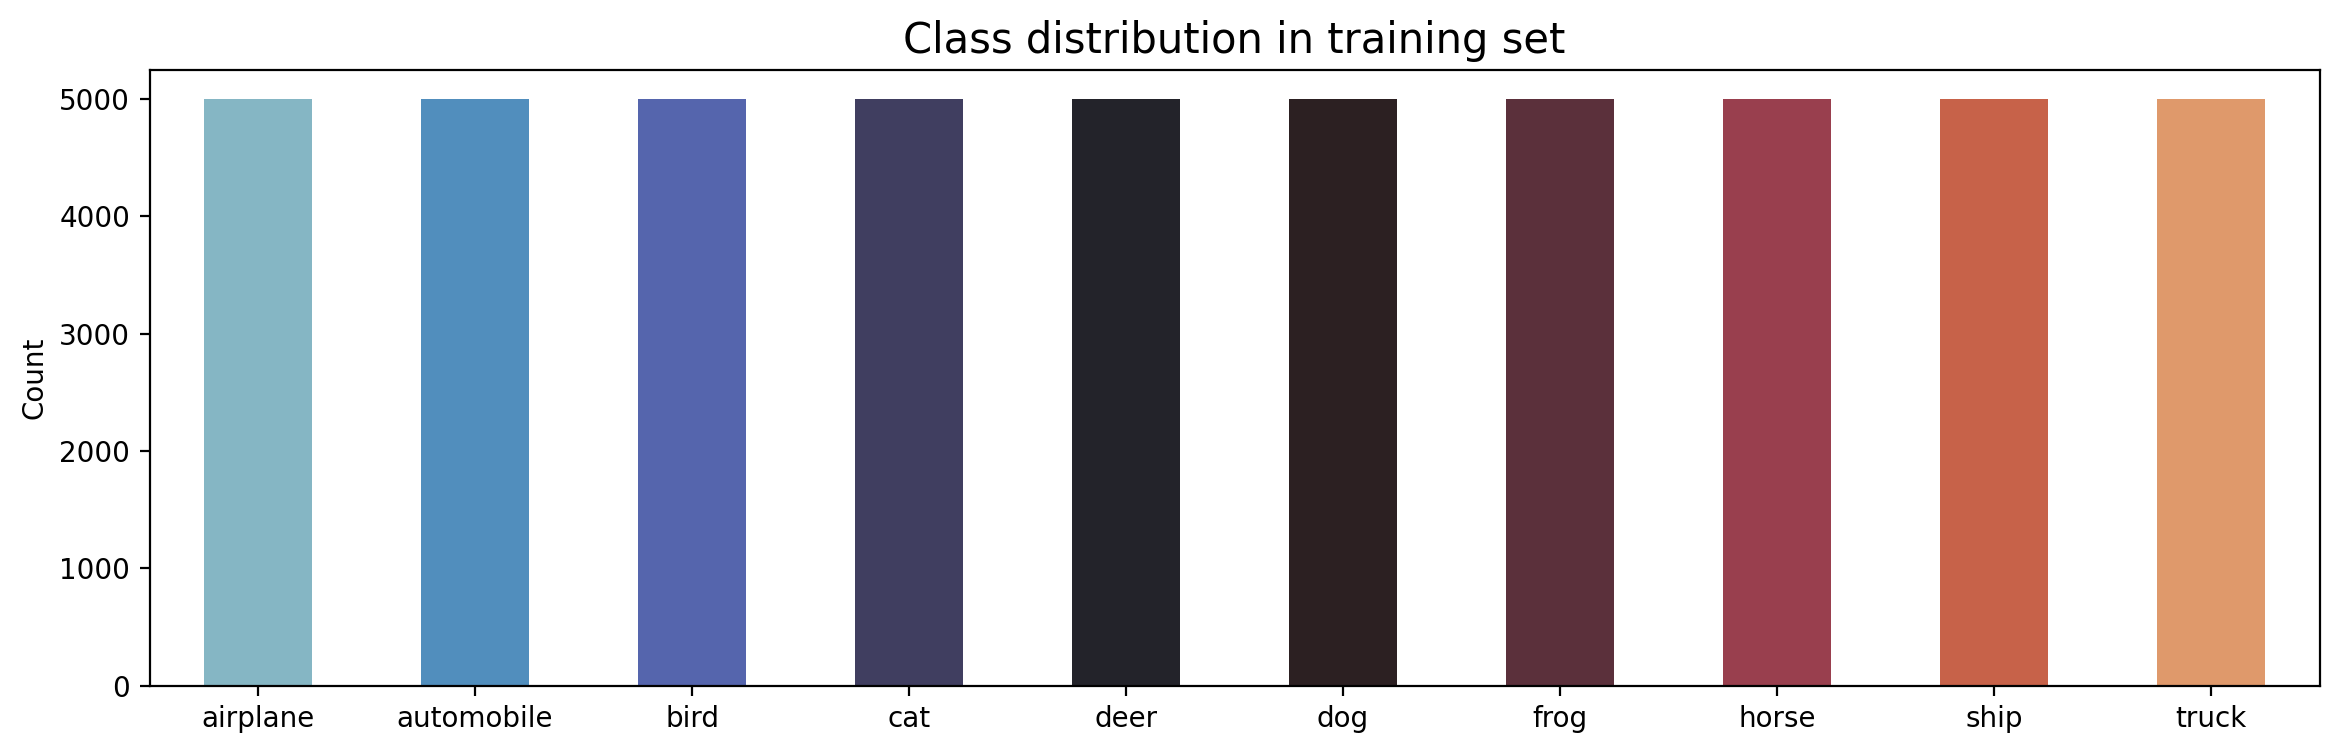

In [5]:
# Count for training dataset

label, count = np.unique(y_train, return_counts=True)
uni = pd.DataFrame(data=count,index=labels, columns=['Count'])

plt.figure(figsize=(14,4),dpi=200)
sns.barplot(data = uni, x=uni.index,y='Count',palette='icefire',width=0.5).set_title('Class distribution in training set',fontsize=15)
plt.show()

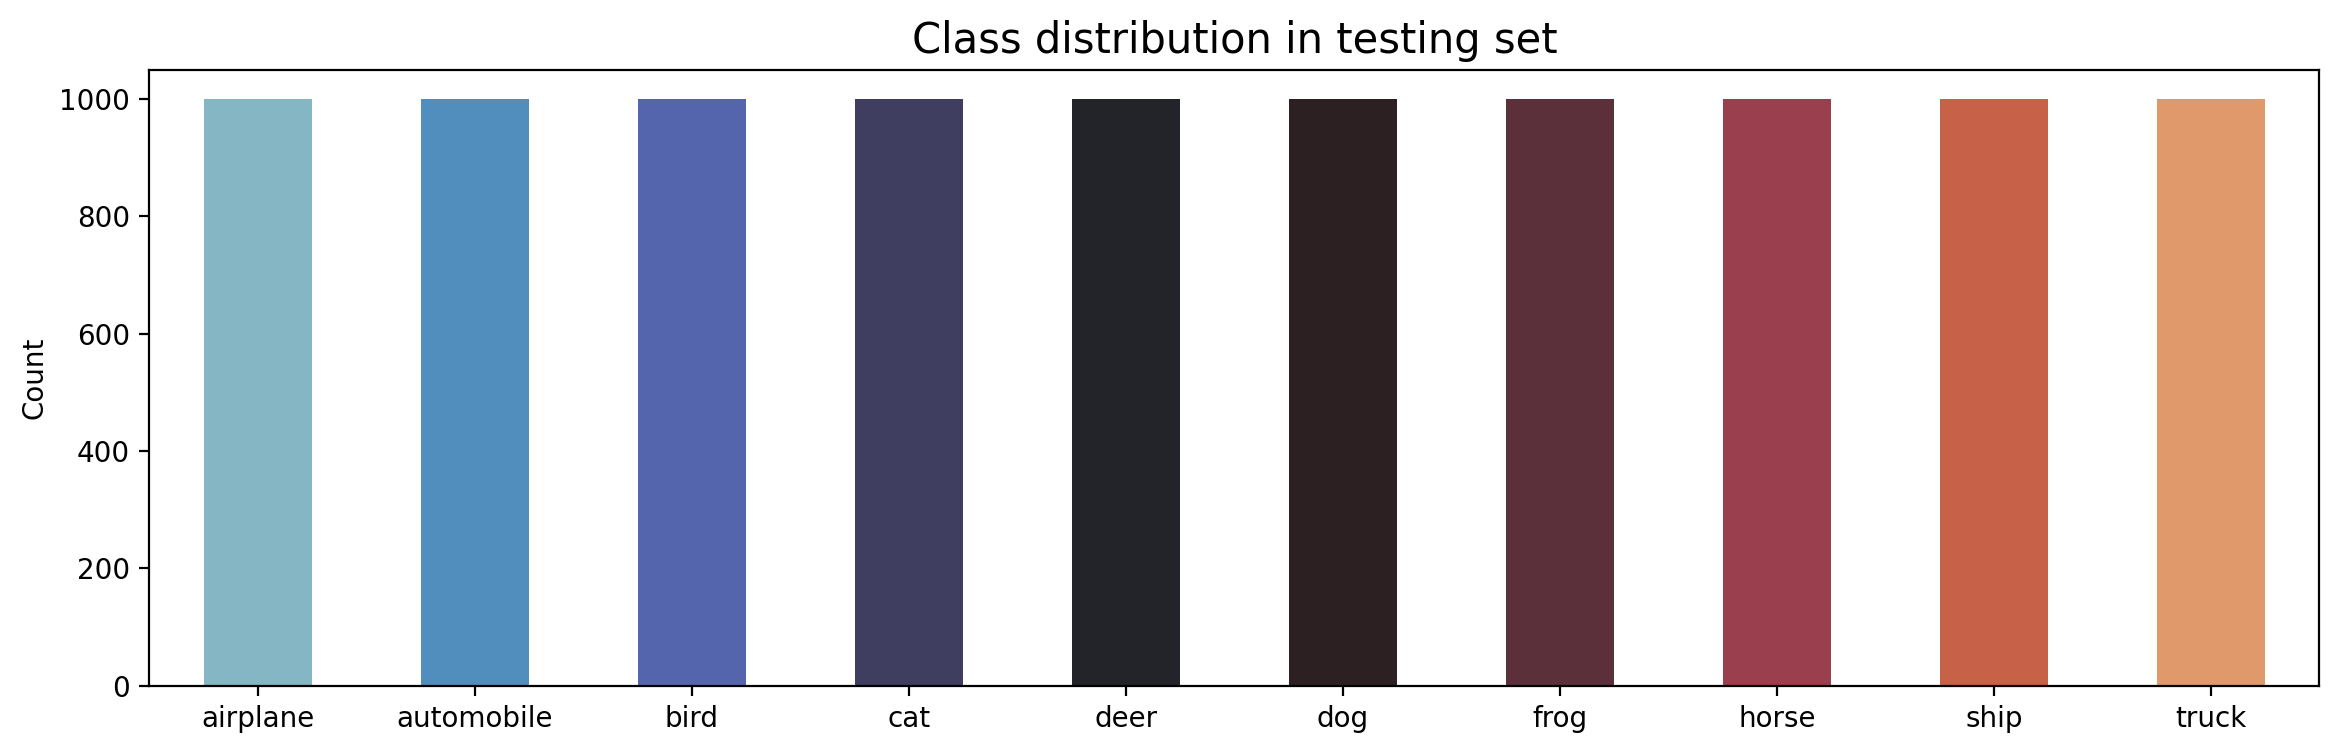

In [6]:
# count for Testing dataset
label,count = np.unique(y_test,return_counts=True)
uni = pd.DataFrame(data=count,index=labels,columns=['Count'])

plt.figure(figsize=(14,4),dpi=200)
sns.barplot(data=uni,x=uni.index,y='Count',palette='icefire',width=0.5).set_title('Class distribution in testing set',fontsize=15)
plt.show()

# Data Preparation

When using Neural Network and Deep Learning based systems, it is usually a good idea to Standardize your data.

1. <b>Normalization:</b> For normalizing the pixel data (Image) we can simply divide the whole pixel values with 255 since pixel values ranges from 0-255. So if we divide them with 255 we automatically normalizee the data between 0-1.
2. <b>One hot encoding:</b> CIFAR 10 has 10 categories, in general we should label the categorical data using the one hot encoding.

In [7]:
def pre_process(data):
  return data/255

def to_cat(data):
  return to_categorical(data,num_classes=10)

In [8]:
X_train = pre_process(X_train)
X_test = pre_process(X_test)

In [9]:
y_train = to_cat(y_train)
y_test = to_cat(y_test)

# Deep Learning Model

In [10]:
in_shape = X_train[0].shape
base_model = models.Sequential()

#Block 1
base_model.add(Conv2D(32,3,activation='relu',padding='same',input_shape =in_shape,))
base_model.add(Conv2D(32,3,activation='relu',padding='same'))
base_model.add(MaxPool2D(2))

#Block 2
base_model.add(Conv2D(64,3,activation='relu',padding='same'))
base_model.add(Conv2D(64,3,activation='relu',padding='same'))
base_model.add(MaxPool2D(2))

# Block 3
base_model.add(Conv2D(128,3,activation='relu',padding='same'))
base_model.add(Conv2D(128,3,activation='relu',padding='same'))
base_model.add(MaxPool2D(2))

# Head of the model
base_model.add(Flatten())
base_model.add(Dense(128,'relu'))
base_model.add(Dense(10,'softmax'))


opt = SGD(learning_rate=0.01,momentum=0.9)
base_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])



In [11]:
base_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                   

In [12]:
# Callback
early_stopping = tf.keras.callbacks.EarlyStopping(patience=5,restore_best_weights=True)

In [13]:
base_history = base_model.fit(X_train,y_train,batch_size=64,validation_data=(X_test,y_test),epochs=50,callbacks=early_stopping,verbose=2)

Epoch 1/50
782/782 - 18s - loss: 1.8146 - accuracy: 0.3374 - val_loss: 1.4847 - val_accuracy: 0.4685 - 18s/epoch - 22ms/step
Epoch 2/50
782/782 - 6s - loss: 1.3285 - accuracy: 0.5223 - val_loss: 1.3406 - val_accuracy: 0.5206 - 6s/epoch - 7ms/step
Epoch 3/50
782/782 - 6s - loss: 1.0914 - accuracy: 0.6113 - val_loss: 1.0627 - val_accuracy: 0.6210 - 6s/epoch - 7ms/step
Epoch 4/50
782/782 - 6s - loss: 0.8976 - accuracy: 0.6840 - val_loss: 0.9642 - val_accuracy: 0.6574 - 6s/epoch - 7ms/step
Epoch 5/50
782/782 - 6s - loss: 0.7540 - accuracy: 0.7360 - val_loss: 0.8458 - val_accuracy: 0.7027 - 6s/epoch - 7ms/step
Epoch 6/50
782/782 - 6s - loss: 0.6360 - accuracy: 0.7780 - val_loss: 0.8494 - val_accuracy: 0.7206 - 6s/epoch - 7ms/step
Epoch 7/50
782/782 - 6s - loss: 0.5391 - accuracy: 0.8104 - val_loss: 0.7886 - val_accuracy: 0.7355 - 6s/epoch - 7ms/step
Epoch 8/50
782/782 - 6s - loss: 0.4526 - accuracy: 0.8387 - val_loss: 0.8520 - val_accuracy: 0.7353 - 6s/epoch - 8ms/step
Epoch 9/50
782/782 - 

In [14]:
# Evaluate

loss0, acc0 = base_model.evaluate(X_test,y_test,batch_size=64,verbose=0)

In [15]:
print('The accuracy of the Base model is:', acc0*100)
print('The loss of the Base model is:', loss0)


The accuracy of the Base model is: 73.54999780654907
The loss of the Base model is: 0.7885916829109192


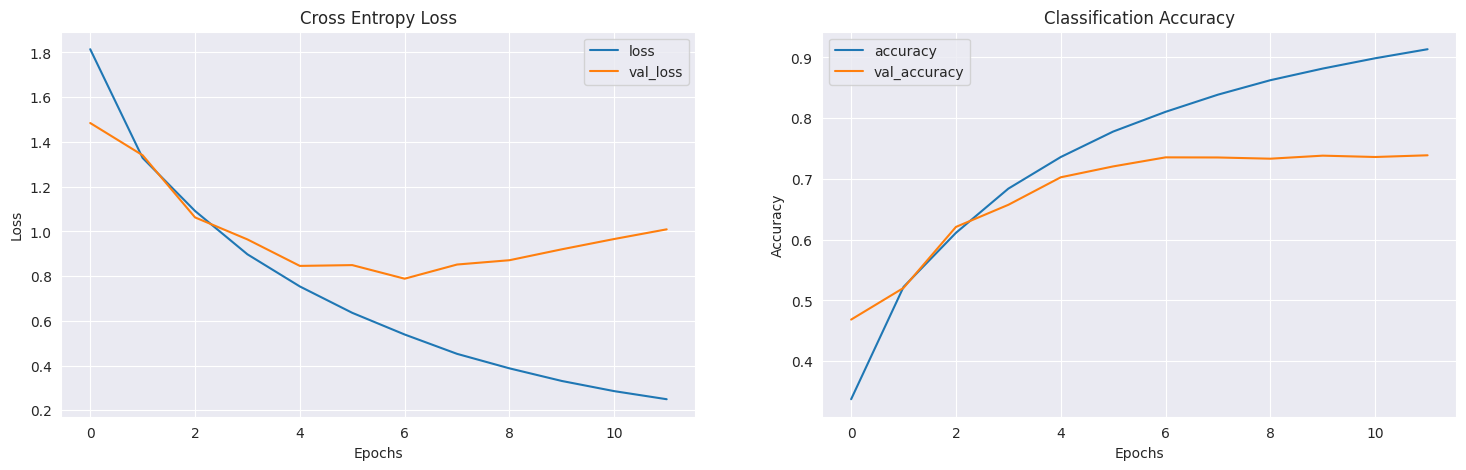

In [16]:
# plots for accuracy and Loss with epochs
sns.set_style('darkgrid')

error = pd.DataFrame(base_history.history)

plt.figure(figsize=(18,5))

plt.subplot(121)
plt.title('Cross Entropy Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(error['loss'],label='loss')
plt.plot(error['val_loss'],label='val_loss')
plt.legend()

plt.subplot(122)
plt.title('Classification Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(error['accuracy'],label='accuracy')
plt.plot(error['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

# Improving Model
if you observe the model training log above you can see that validation loss id increasing a lot which means our model is overfitting.

Overfittingmeans our model performs god on th training data set but fails to generalise on the unseen data.Lets try to reduce overfitting

# Adding Dropout

So lets regularize the model. In deep learning drop out is very good form of regularization.

What is dropout?

Dropout is a regularization method that approximates training a large number of neural networks with different architectures in parallel.

In [21]:
# model with dropout layer

base_model_dp = models.Sequential()

# Block1
base_model_dp.add(Conv2D(32,3,activation='relu',padding='same',input_shape=in_shape,))
base_model_dp.add(Conv2D(32,3,activation='relu',padding='same'))
base_model_dp.add(MaxPool2D(2))
base_model_dp.add(Dropout(0.2))# dropout)

#Block2
base_model_dp.add(Conv2D(64,3,activation='relu',padding='same'))
base_model_dp.add(Conv2D(64,3,activation='relu',padding='same'))
base_model_dp.add(MaxPool2D(2))
base_model_dp.add(Dropout(0.2))# dropout

#Block3
base_model_dp.add(Conv2D(128,3,activation='relu',padding='same'))
base_model_dp.add(Conv2D(128,3,activation='relu',padding='same'))
base_model_dp.add(MaxPool2D(2))
base_model_dp.add(Dropout(0.2))# dropout


# Top layer
base_model_dp.add(Flatten())
base_model_dp.add(Dense(128,'relu'))
base_model_dp.add(Dropout(0.2)) # dropout
base_model_dp.add(Dense(10,'softmax'))


#compile the model
opt = SGD(learning_rate=0.01,momentum=0.9)
base_model_dp.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

# callback
early_stopping = tf.keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)


In [22]:
base_model_dp.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 64)        36928     
                                                      

In [23]:
base_history_dp = base_model_dp.fit(X_train,y_train,
                                    batch_size=64,
                                    epochs=50,
                                    validation_data=(X_test,y_test),
                                    callbacks= [early_stopping],
                                    verbose=2)

Epoch 1/50
782/782 - 10s - loss: 2.0111 - accuracy: 0.2547 - val_loss: 1.7154 - val_accuracy: 0.3822 - 10s/epoch - 12ms/step
Epoch 2/50
782/782 - 7s - loss: 1.5538 - accuracy: 0.4366 - val_loss: 1.3547 - val_accuracy: 0.5074 - 7s/epoch - 9ms/step
Epoch 3/50
782/782 - 7s - loss: 1.3083 - accuracy: 0.5265 - val_loss: 1.1332 - val_accuracy: 0.5899 - 7s/epoch - 8ms/step
Epoch 4/50
782/782 - 9s - loss: 1.1336 - accuracy: 0.5978 - val_loss: 1.0365 - val_accuracy: 0.6317 - 9s/epoch - 12ms/step
Epoch 5/50
782/782 - 7s - loss: 0.9828 - accuracy: 0.6491 - val_loss: 0.8769 - val_accuracy: 0.6940 - 7s/epoch - 9ms/step
Epoch 6/50
782/782 - 7s - loss: 0.8820 - accuracy: 0.6896 - val_loss: 0.7682 - val_accuracy: 0.7283 - 7s/epoch - 9ms/step
Epoch 7/50
782/782 - 7s - loss: 0.8006 - accuracy: 0.7178 - val_loss: 0.7463 - val_accuracy: 0.7425 - 7s/epoch - 9ms/step
Epoch 8/50
782/782 - 7s - loss: 0.7338 - accuracy: 0.7427 - val_loss: 0.7308 - val_accuracy: 0.7474 - 7s/epoch - 9ms/step
Epoch 9/50
782/782 -

# Evaluate of Dropout model

In [24]:
loss1, acc1 = base_model_dp.evaluate(X_test,y_test,batch_size=63,verbose=2)

print('The accuracy of the Dropout Model is: ',acc1*100)
print('The Loss of the Dropout Model is: ',loss1)


159/159 - 1s - loss: 0.5845 - accuracy: 0.8031 - 1s/epoch - 8ms/step
The accuracy of the Dropout Model is:  80.30999898910522
The Loss of the Dropout Model is:  0.5844544172286987


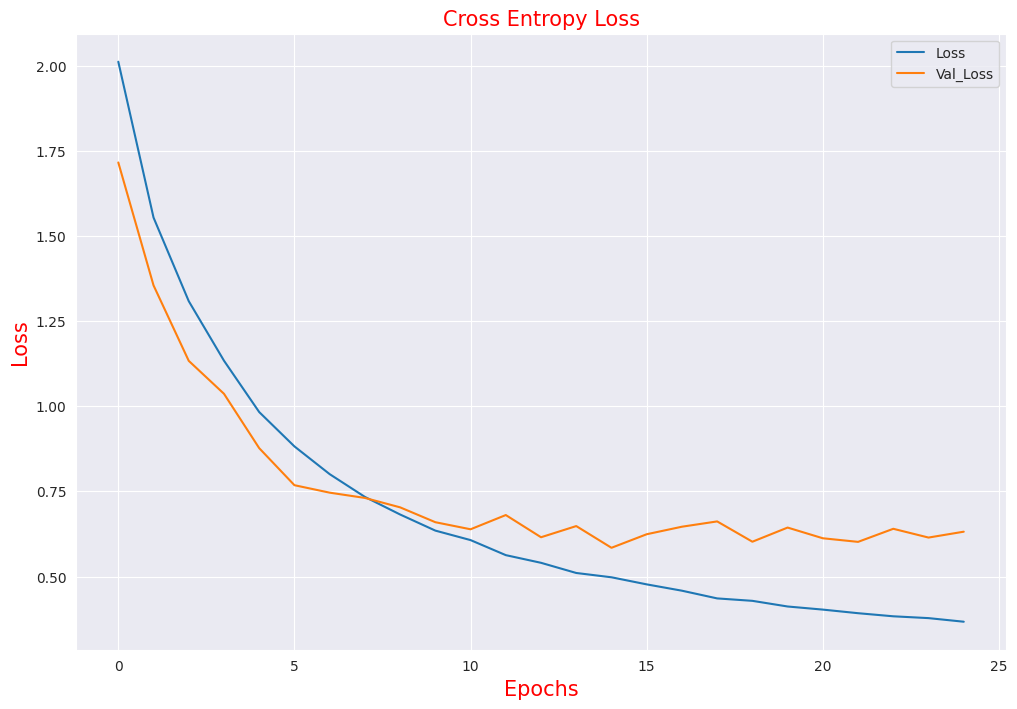

In [33]:
# Plots for accuracy and Loss with epochs
plt.figure(figsize=(12,8))
plt.plot(base_history_dp.history['loss'],label='Loss')
plt.plot(base_history_dp.history['val_loss'],label='Val_Loss')
plt.legend()
plt.xlabel('Epochs',fontsize=15,c='r')
plt.ylabel('Loss',fontsize=15,c='r')
plt.title('Cross Entropy Loss',fontsize=15,c='r')
plt.show()


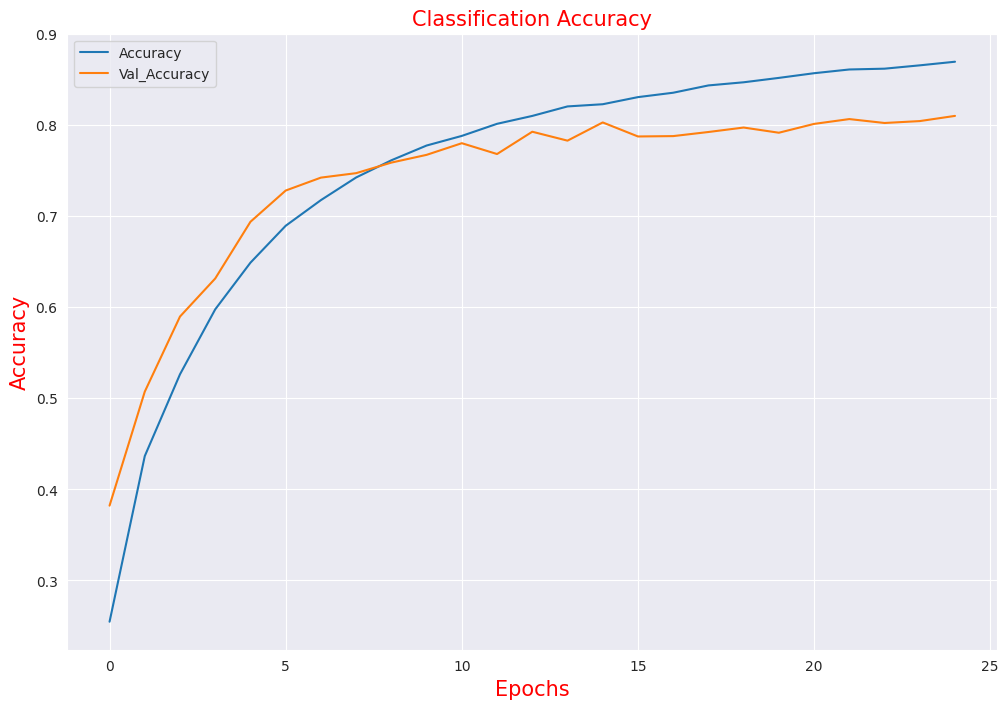

In [34]:
plt.figure(figsize=(12,8))
plt.plot(base_history_dp.history['accuracy'],label='Accuracy')
plt.plot(base_history_dp.history['val_accuracy'],label='Val_Accuracy')
plt.legend()
plt.xlabel('Epochs',fontsize=15,c='r')
plt.ylabel('Accuracy',fontsize=15,c='r')
plt.title('Classification Accuracy',fontsize=15,c='r')
plt.show()

# Data Augmentation and Dropout

To reduce overfitting we agreed that adding more data will reduce overfitting. Even when our model doesnt overfits, its very good idea to add more data if you can. But collecting data is very tough and also data preprocessing is not as fancy it sounds. But what if we can genrate data from our existing data. We already have 60K images and we can generate lots and lots of images out of it

In [35]:
base_model_with_DA_DP = models.Sequential()

# 3 block vgg style model
# Base of the model

# block1
base_model_with_DA_DP.add(Conv2D(32,3,activation='relu',padding='same',input_shape = in_shape))
base_model_with_DA_DP.add(Conv2D(32,3,activation='relu',padding='same'))
base_model_with_DA_DP.add(MaxPool2D(2))
base_model_with_DA_DP.add(Dropout(0.2))

# block 2
base_model_with_DA_DP.add(Conv2D(64,3,activation='relu',padding='same'))
base_model_with_DA_DP.add(Conv2D(64,3,activation='relu',padding='same'))
base_model_with_DA_DP.add(MaxPool2D(2))
base_model_with_DA_DP.add(Dropout(0.2))

# block 3
base_model_with_DA_DP.add(Conv2D(128,3,activation='relu',padding='same'))
base_model_with_DA_DP.add(Conv2D(128,3,activation='relu',padding='same'))
base_model_with_DA_DP.add(MaxPool2D(2))
base_model_with_DA_DP.add(Dropout(0.2))

# Top layer of the model
base_model_with_DA_DP.add(Flatten())
base_model_with_DA_DP.add(Dense(128,activation='relu'))
base_model_with_DA_DP.add(Dropout(0.2))
base_model_with_DA_DP.add(Dense(10,activation='softmax'))


# compile
opt = SGD(learning_rate=0.01,momentum=0.9)
base_model_with_DA_DP.compile(optimizer= opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Data Augmentation

datagen = ImageDataGenerator(rotation_range=10,
                             horizontal_flip=True,
                             width_shift_range=0.1,
                             height_shift_range=0.1)

train_gen = datagen.flow(X_train,y_train,batch_size=64)

#model fit
base_history=base_model_with_DA_DP.fit(train_gen,
                                       steps_per_epoch = int(X_train.shape[0] // 64),
                                       validation_data = (X_test,y_test),
                                       epochs=50,verbose=2)

base_model_with_DA_DP.summary()



Epoch 1/50
781/781 - 32s - loss: 1.9808 - accuracy: 0.2656 - val_loss: 1.5824 - val_accuracy: 0.4262 - 32s/epoch - 40ms/step
Epoch 2/50
781/781 - 30s - loss: 1.5982 - accuracy: 0.4167 - val_loss: 1.3995 - val_accuracy: 0.4898 - 30s/epoch - 38ms/step
Epoch 3/50
781/781 - 29s - loss: 1.4321 - accuracy: 0.4789 - val_loss: 1.2452 - val_accuracy: 0.5511 - 29s/epoch - 37ms/step
Epoch 4/50
781/781 - 30s - loss: 1.3227 - accuracy: 0.5180 - val_loss: 1.1154 - val_accuracy: 0.5980 - 30s/epoch - 38ms/step
Epoch 5/50
781/781 - 29s - loss: 1.2115 - accuracy: 0.5659 - val_loss: 1.0226 - val_accuracy: 0.6294 - 29s/epoch - 37ms/step
Epoch 6/50
781/781 - 29s - loss: 1.1136 - accuracy: 0.6037 - val_loss: 0.9408 - val_accuracy: 0.6684 - 29s/epoch - 37ms/step
Epoch 7/50
781/781 - 29s - loss: 1.0249 - accuracy: 0.6367 - val_loss: 0.8400 - val_accuracy: 0.7007 - 29s/epoch - 37ms/step
Epoch 8/50
781/781 - 29s - loss: 0.9694 - accuracy: 0.6589 - val_loss: 0.8365 - val_accuracy: 0.7110 - 29s/epoch - 38ms/step


# Evaluation of Data Augmentation and Dropout model

In [36]:
loss2,acc2=base_model_with_DA_DP.evaluate(X_test,y_test,batch_size = 64, verbose = 0)

print('The accuracy of the Base Model is:',acc2*100)
print('The Loss of the Base Model is:',loss2)

The accuracy of the Base Model is: 83.96999835968018
The Loss of the Base Model is: 0.500601053237915


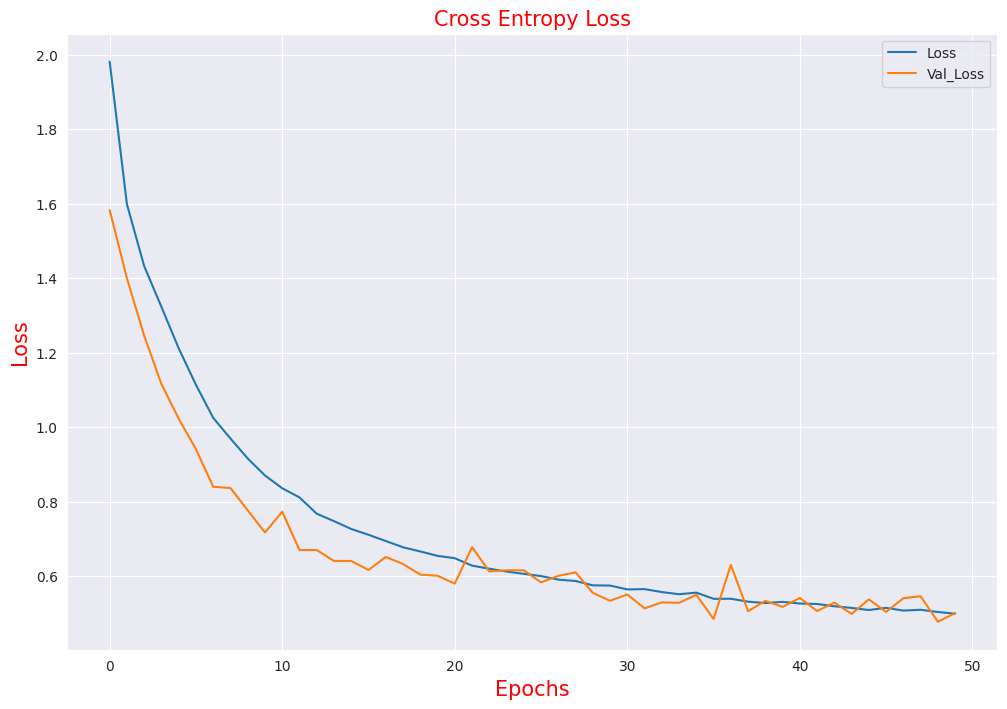

In [37]:
# Plots for accuracy and Loss with epochs
plt.figure(figsize=(12,8))
plt.plot(base_history.history['loss'],label='Loss')
plt.plot(base_history.history['val_loss'],label='Val_Loss')
plt.legend()
plt.xlabel('Epochs',fontsize=15,c='r')
plt.ylabel('Loss',fontsize=15,c='r')
plt.title('Cross Entropy Loss',fontsize=15,c='r')
plt.show()

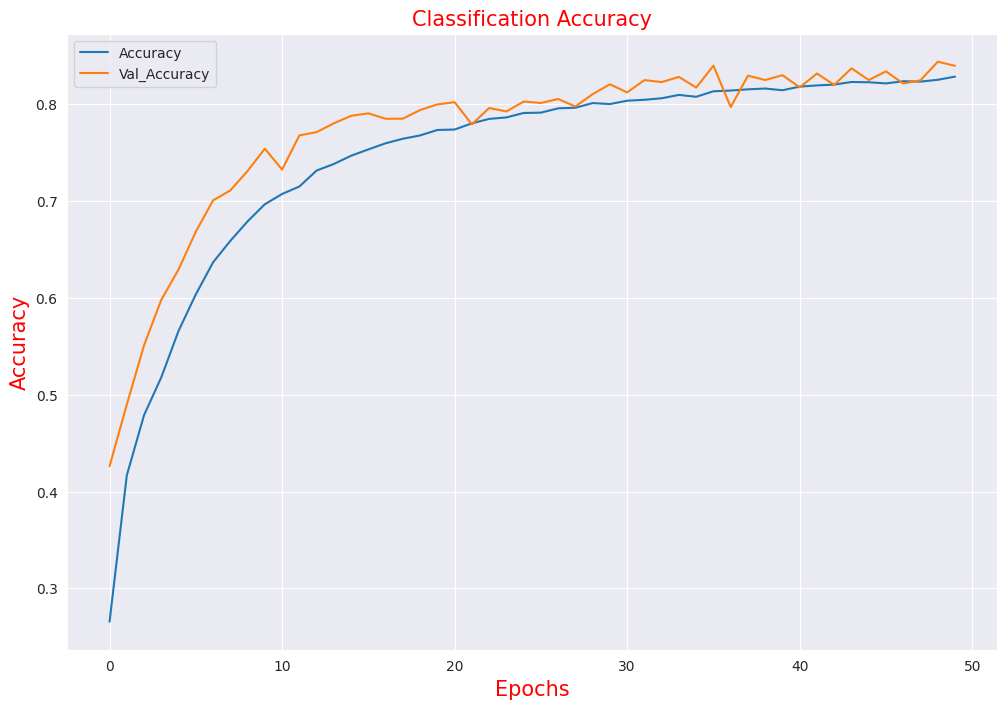

In [38]:
plt.figure(figsize=(12,8))
plt.plot(base_history.history['accuracy'],label='Accuracy')
plt.plot(base_history.history['val_accuracy'],label='Val_Accuracy')
plt.legend()
plt.xlabel('Epochs',fontsize=15,c='r')
plt.ylabel('Accuracy',fontsize=15,c='r')
plt.title('Classification Accuracy',fontsize=15,c='r')
plt.show()

# Dropout and Data Augmentation and Batch Normalization

Batch normalization works just the same way as we normalize the input data where we divided the x_train/255. What we are trying to do there is we are arranging all the features in same scale so that model converges easily and we can reduce the distrotions. Our input layer is lucky enough to have everything in same scale why not the rest of the layers?

This is what exactly we do in batch normalization, when ever we passs the CNN throuh a batch normalization layer we are normalizing the weights so that our model will be stable and we can train model longer and also use larger learning rate.

Also the kind of normalization we use is batch normalization which means we compute mean and varience for each mini batch not the whole data.

In [39]:
# Model
model = models.Sequential()

# 3 block vgg style model
# Base of the model

# block1
model.add(Conv2D(32,3,activation='relu',padding='same',input_shape = in_shape))
model.add(BatchNormalization())
model.add(Conv2D(32,3,activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(2))
base_model.add(Dropout(0.2))

# block 2
model.add(Conv2D(64,3,activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64,3,activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(2))
model.add(Dropout(0.3))

# block 3
model.add(Conv2D(128,3,activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128,3,activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(2))
model.add(Dropout(0.4))

# Head of the model
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

model.summary()

# compile
#opt = SGD(learning_rate=0.01,momentum=0.9)
model.compile(optimizer= 'adam', loss='categorical_crossentropy', metrics=['accuracy'])

# callback
early_stoping = tf.keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)

# Data Augementation
datagen = ImageDataGenerator(rotation_range=10,
                             horizontal_flip=True,
                             width_shift_range=0.1,
                             height_shift_range=0.1
                                )
train_gen = datagen.flow(X_train,y_train,batch_size=64)


# Model fit
model_history = model.fit(train_gen,
                          validation_data = (X_test,y_test),
                          epochs = 200,
                          callbacks=[early_stoping],
                          verbose = 0)
# model summary
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_19 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                      

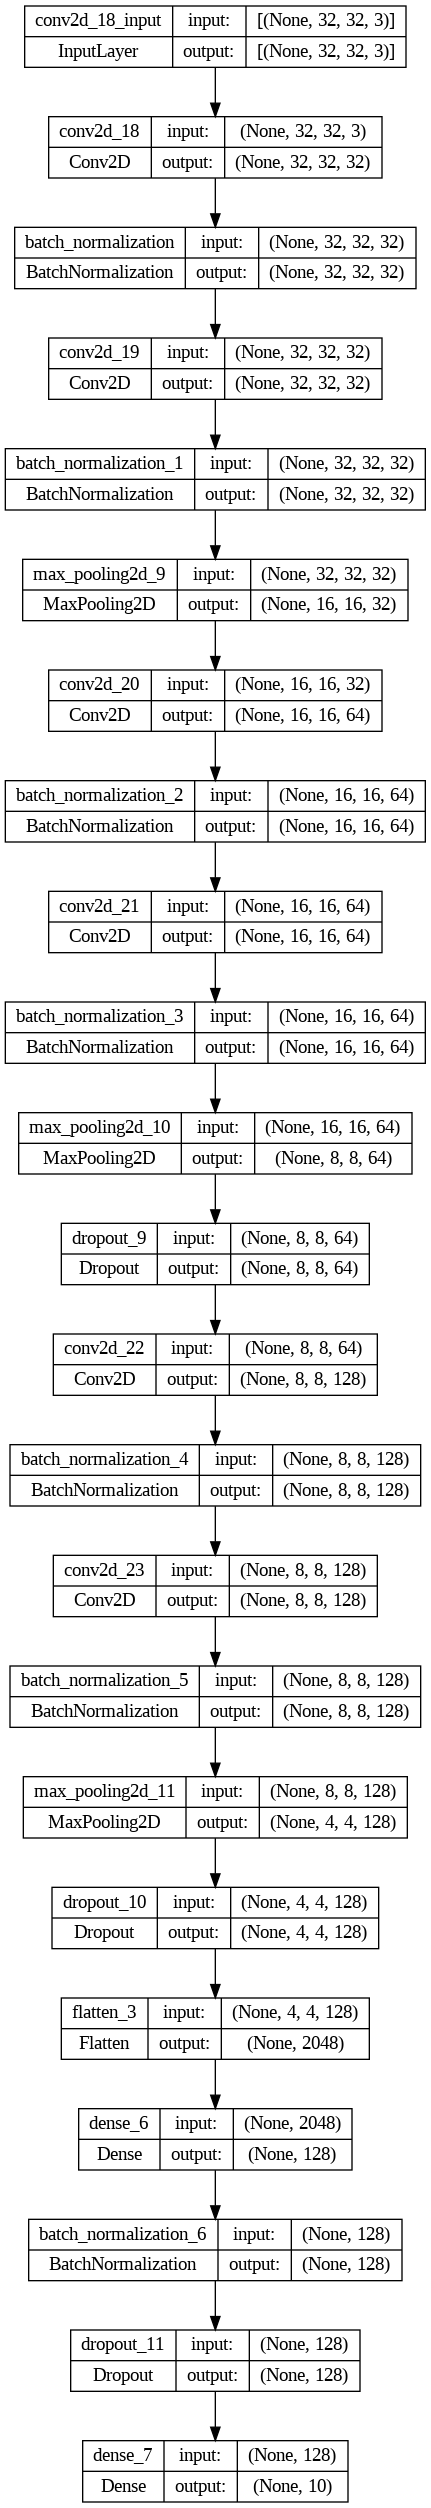

In [40]:
tf.keras.utils.plot_model(model,to_file='/content/drive/MyDrive/DEEP LEARNING PROJECTS/CIFAR-10: Image Classification/model.png',show_shapes=True)

In [41]:
# Evaluvate
loss3,acc3 = model.evaluate(X_test,y_test,batch_size = 64, verbose = 0)

print('The accuracy of the Base Model is:',acc3*100)
print('The Loss of the Base Model is:',loss3)

The accuracy of the Base Model is: 88.33000063896179
The Loss of the Base Model is: 0.35462918877601624


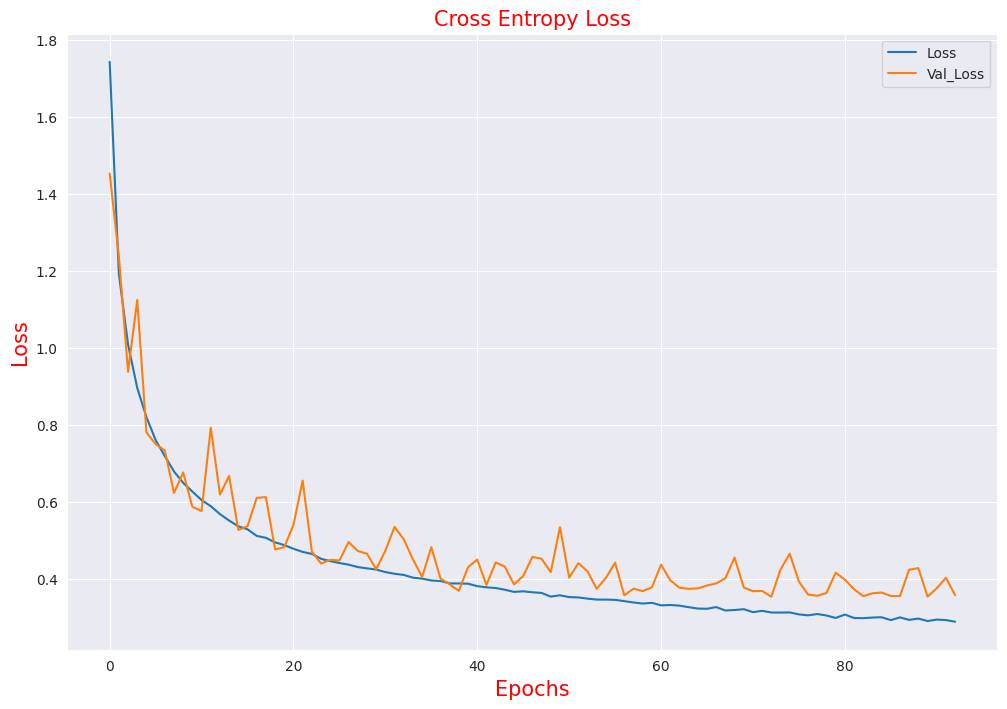

In [43]:
# Plots for accuracy and Loss with epochs
plt.figure(figsize=(12,8))
plt.plot(model_history.history['loss'],label='Loss')
plt.plot(model_history.history['val_loss'],label='Val_Loss')
plt.legend()
plt.xlabel('Epochs',fontsize=15,c='r')
plt.ylabel('Loss',fontsize=15,c='r')
plt.title('Cross Entropy Loss',fontsize=15,c='r')
plt.show()

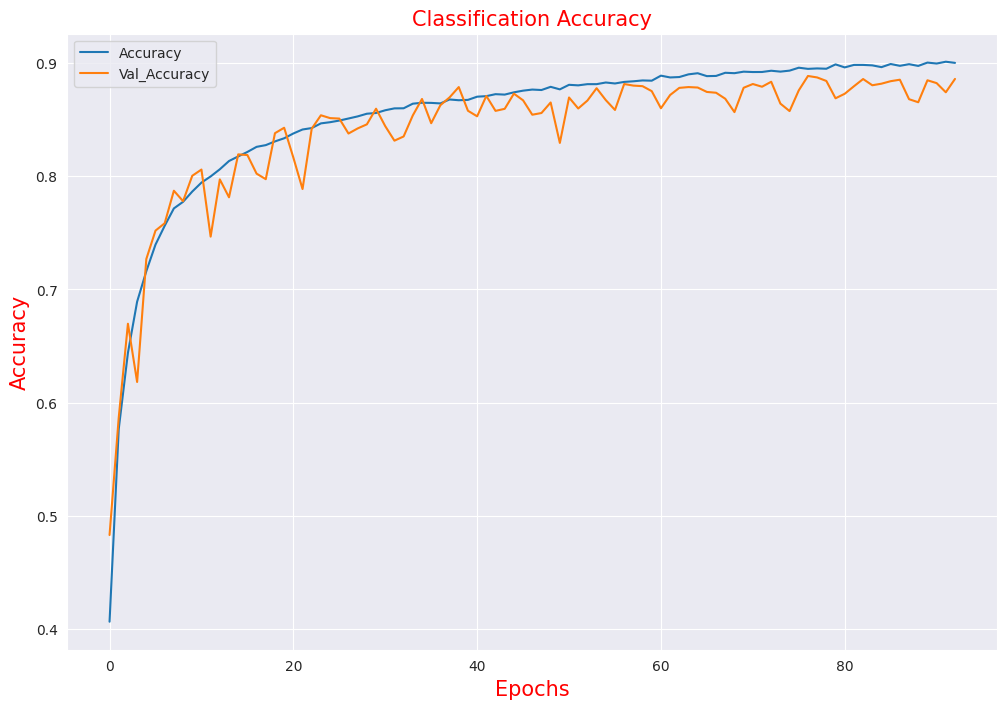

In [44]:
plt.figure(figsize=(12,8))
plt.plot(model_history.history['accuracy'],label='Accuracy')
plt.plot(model_history.history['val_accuracy'],label='Val_Accuracy')
plt.legend()
plt.xlabel('Epochs',fontsize=15,c='r')
plt.ylabel('Accuracy',fontsize=15,c='r')
plt.title('Classification Accuracy',fontsize=15,c='r')
plt.show()

In [45]:
model.save('/content/drive/MyDrive/DEEP LEARNING PROJECTS/CIFAR-10: Image Classification/cifar_cnn_sachin.h5')

# Model Evaluation

In [46]:
accuracy = pd.DataFrame({'Model_name':['Base_model','Dropout','Data_augemtaion + Dropout','Dropout + Data Augmentation + Batch Normalization'],'Accuracy':[acc0*100,acc1*100,acc2*100,acc3*100]})
accuracy


,Model_name,Accuracy
0,Base_model,73.549998
1,Dropout,80.309999
2,Data_augemtaion + Dropout,83.969998
3,Dropout + Data Augmentation + Batch Normalization,88.330001


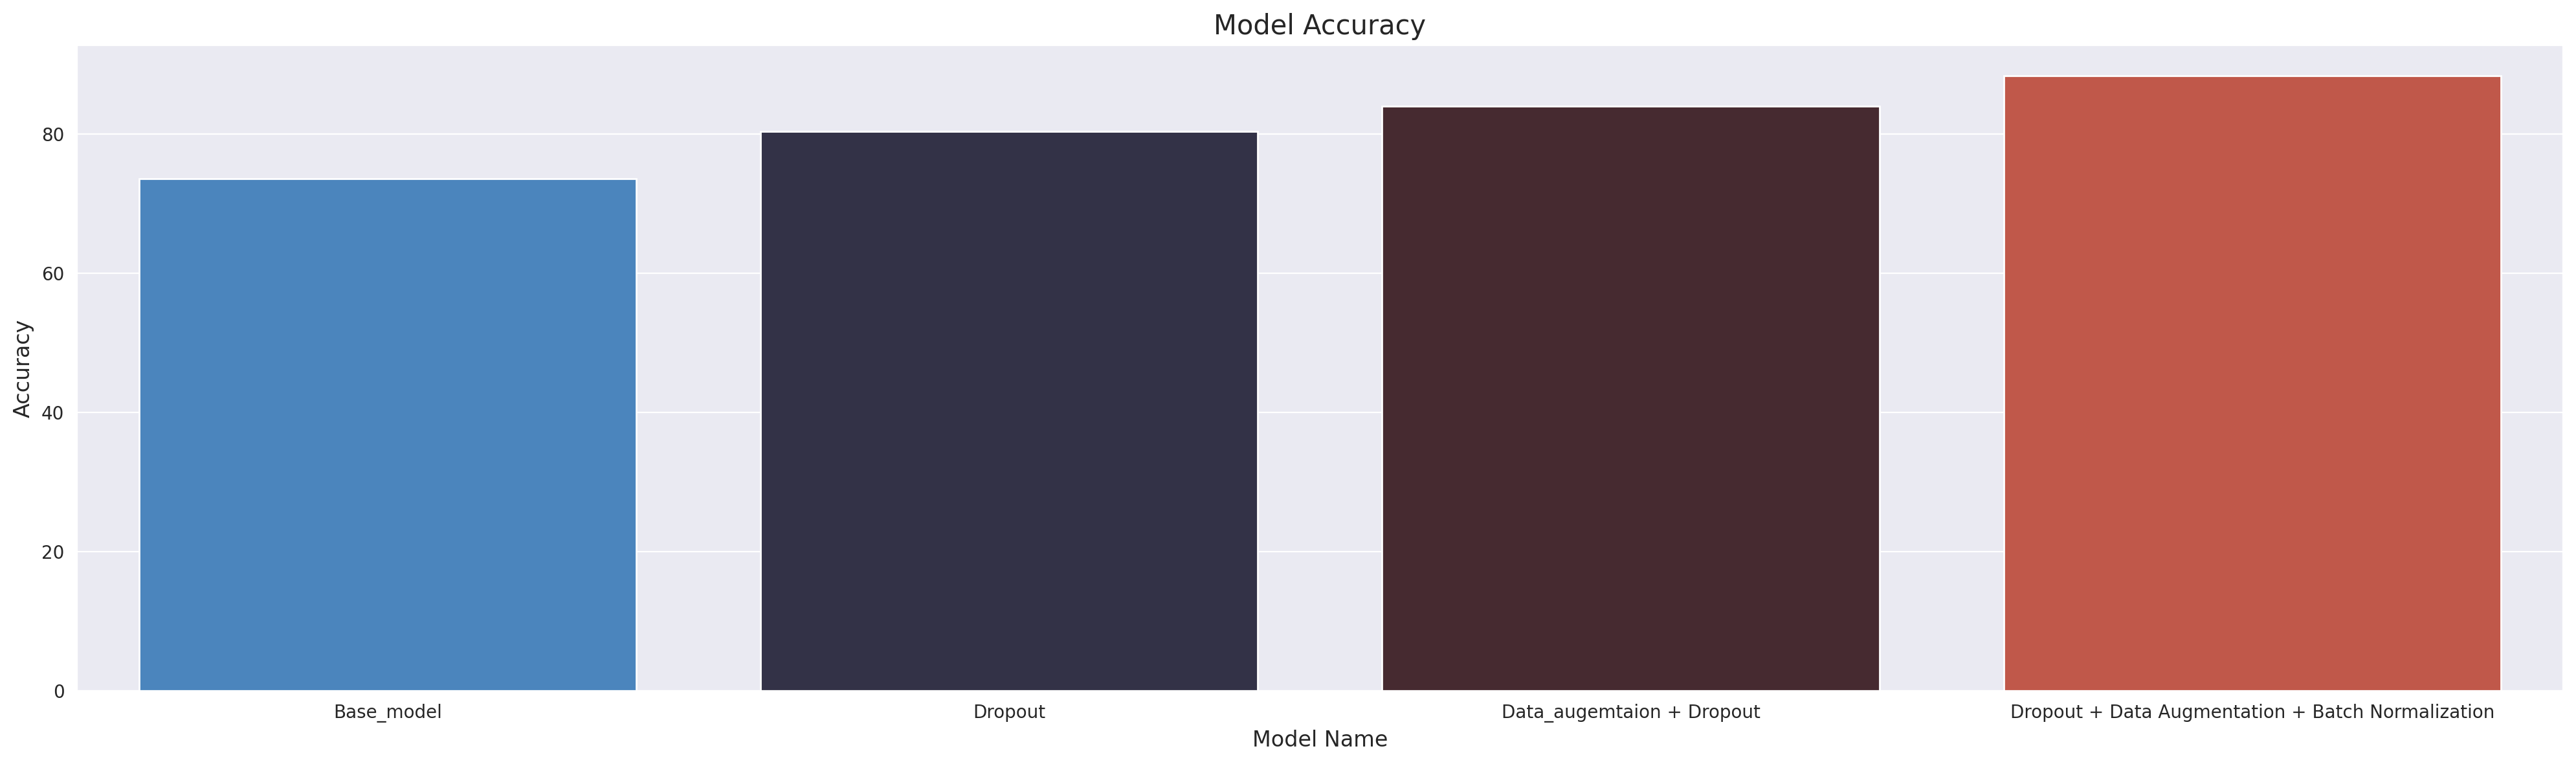

In [47]:
plt.figure(figsize=(20,6),dpi=200)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
sns.barplot(data=accuracy,x='Model_name',y='Accuracy',palette='icefire')
plt.title('Model Accuracy',fontsize=15)
plt.xlabel('Model Name',fontsize=12)
plt.ylabel('Accuracy',fontsize=12)
plt.tight_layout()
plt.show()

In [54]:
y_pred = model.predict(X_test)
# y_pred = np.argmax(y_pred,axis=1)

313/313 [==============================] - 1s 3ms/step


In [55]:
from sklearn.metrics import classification_report
from sklearn.preprocessing import MultiLabelBinarizer

# Assuming y_test is in multilabel format (10000 samples, 10 classes)
mlb = MultiLabelBinarizer()
y_test_binary = mlb.fit_transform(y_test)

# Assuming y_pred is the predicted probabilities or labels
# If y_pred is in label format (shape: (10000,))
# Convert it to binary format
# y_pred_binary = mlb.transform(y_pred.reshape(-1, 1))

# If y_pred is in probability format (shape: (10000, 10))
# Convert it to label format first, then to binary format
y_pred_labels = np.argmax(y_pred, axis=1)
y_pred_binary = mlb.transform(y_pred_labels.reshape(-1, 1))

# Now you can use classification_report
print(classification_report(y_test_binary, y_pred_binary))


              precision    recall  f1-score   support

           0       1.00      0.10      0.18     10000
           1       1.00      0.11      0.19     10000

   micro avg       1.00      0.10      0.19     20000
   macro avg       1.00      0.10      0.19     20000
weighted avg       1.00      0.10      0.19     20000
 samples avg       0.21      0.10      0.14     20000



In [49]:
print(classification_report(y_test,y_pred))

ValueError: ignored